In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
#Changng directory 
%cd C:\Users\Akshay\Desktop\Data_Science\Final Project\Network Intrusion Detection\NSL_Dataset

C:\Users\Akshay\Desktop\Data_Science\Final Project\Network Intrusion Detection\NSL_Dataset


#### Reading Train and Test Data

In [4]:
names=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot",
       "num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", 
       "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","count","srv_count",
       "serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", 
       "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate",
       "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
       "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack"] 
train_df=pd.read_csv('Train.csv',names=names)


In [5]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
train_df.shape

(125973, 42)

In [7]:
test_df=pd.read_csv('Test.csv',names=names)

In [8]:
test_df.shape

(22544, 42)

In [9]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [10]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


#### EDA for Train Dataset

In [530]:
#Checking data types of varaibles,missing value presence and no, of each data type
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

In [11]:
#Checking train data for presence of missing values
train_df.isnull().any().value_counts() 

False    42
dtype: int64

So train data is clean and does not contain missing values

In [220]:
#Calculating general statistics for the train data to get insights about the data
train_df.describe(percentiles=[0.01,0.05,0.1,0.2,0.25,0.5,0.75,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,20%,25%,50%,75%,90%,95%,99%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.56,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.0,0.00,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,516.00,3375.80,8314.00,25519.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.479000e+03


### EDA for Test Dataset

In [258]:
#Checking Total observatons,presence of missing values, data types of each feature and total no of feature of each type
#of test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
duration                       22544 non-null int64
protocol_type                  22544 non-null object
service                        22544 non-null object
flag                           22544 non-null object
src_bytes                      22544 non-null int64
dst_bytes                      22544 non-null int64
land                           22544 non-null int64
wrong_fragment                 22544 non-null int64
urgent                         22544 non-null int64
hot                            22544 non-null int64
num_failed_logins              22544 non-null int64
logged_in                      22544 non-null int64
num_compromised                22544 non-null int64
root_shell                     22544 non-null int64
su_attempted                   22544 non-null int64
num_root                       22544 non-null int64
num_file_creations             22544 non-null int64
num_

In [569]:
#Checking test data for presence of missing values
test_df.isnull().any().value_counts() 

False    42
dtype: int64


So train data is clean and does not contain missing values

In [260]:
#Checking genral stats of test data variables whose dta type is object
test_df.describe(include='object').T.head()

,count,unique,top,freq
protocol_type,22544,3,tcp,18880
service,22544,64,http,7853
flag,22544,11,SF,14875
attack,22544,38,normal,9711


From  stastical report we observed that variable num_outbounds is a binanry variable and its min value as well as max value are both 0.So it may be redundant

In [12]:
#This variable is worthless and not contributing anything 
print(train_df['num_outbound_cmds'].value_counts())
print(test_df['num_outbound_cmds'].value_counts())

0    125973
Name: num_outbound_cmds, dtype: int64
0    22544
Name: num_outbound_cmds, dtype: int64


In [13]:
#so removing it from both train and test data
train_df.drop(['num_outbound_cmds'], axis=1, inplace=True)
test_df.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [14]:
# Attack Class Distribution
train_df['attack'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

###### Our task is to build network intrusion detection system to detect anamolies and attacks in the network. There are two problems.  

1. Binomial Classification: Activity is normal or attack 

2. Multinomial classification: Activity is normal or DOS or PROBE or R2L or U2R 

# 1.Binomial Classification:  Activity is normal or attack

For this we have to create the dependent variable incorporating categories as Normal or attack

In [15]:
#This is a list of which incorporates all types of attacks.
attack_type=['neptune','satan','ipsweep','portsweep','smurf','nmap','back','teardrop','warezclient','pod','guess_passwd',
             'buffer_overflow','warezmaster','land','imap','rootkit','loadmodule','ftp_write','multihop','phf','perl',
             'spy','mscan','apache2','processtable','snmpguess','saint','mailbomb','snmpgetattack ','httptunnel','named',
             'ps','sendmail','xterm','land','xsnoop','worm','sqlattack','udpstorm ']  

In [16]:
#Creating our dependent variable for binomial classification for train data by assigning normal as 0 and any attack as 1
train_df['attack']=train_df['attack'].apply(lambda x:1 if x in attack_type else 0)

In [17]:
#Creating our dependent variable for binomial classification for test data by assigning normal as 0 and any attack as 1

test_df['attack']=test_df['attack'].apply(lambda x:1 if x in attack_type else 0)

In [18]:
#This is brief look of the train data with binomial depenmdent variable
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [19]:
#This is brief look of the test data with binomial depenmdent variable
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,1
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,1


In [20]:
#Categorical distribution of attack varable i.e dependent variable in train data
train_df['attack'].value_counts()


0    67343
1    58630
Name: attack, dtype: int64

In [21]:
#Categorical distribution of attack varable i.e dependent variable in test data
test_df['attack'].value_counts()

1    12644
0     9900
Name: attack, dtype: int64

In [22]:
# Seperating categorical and numerical variable in train dtaset 
cat_list=train_df.select_dtypes(include='object').columns.tolist()
num_list=train_df.select_dtypes(include=np.number).columns.tolist()

### Graphical EDA 

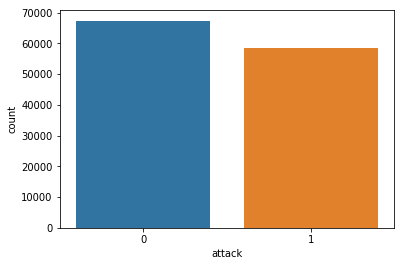

In [271]:
#Bar graph of attack variable in train ddata where 0 signifies normal and 1 signifies attack
sns.countplot(train_df['attack'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


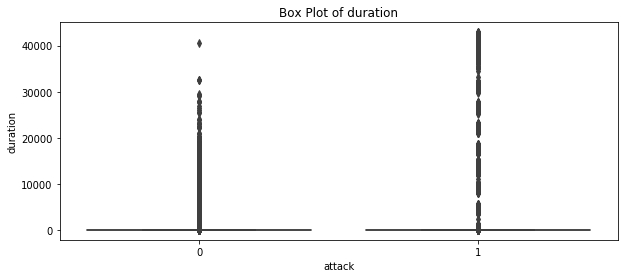

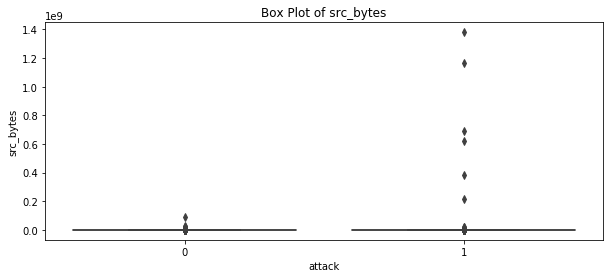

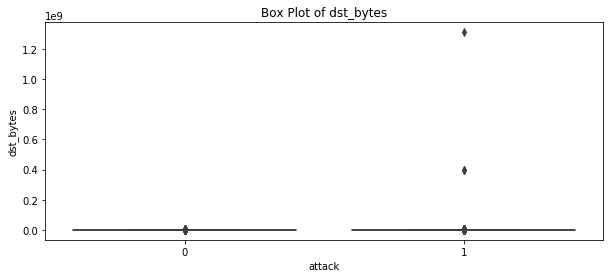

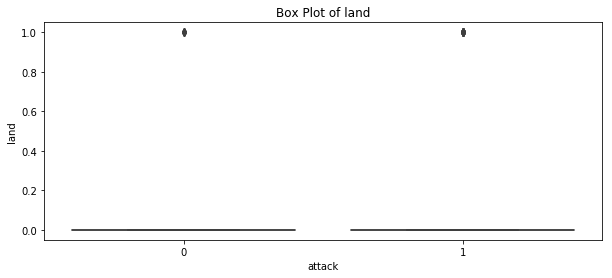

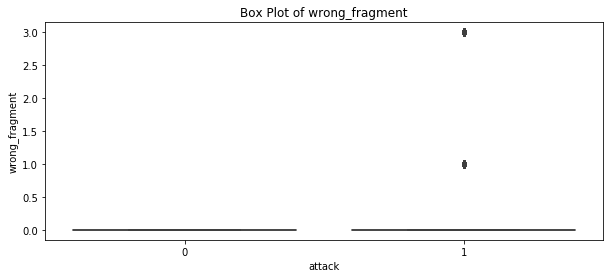

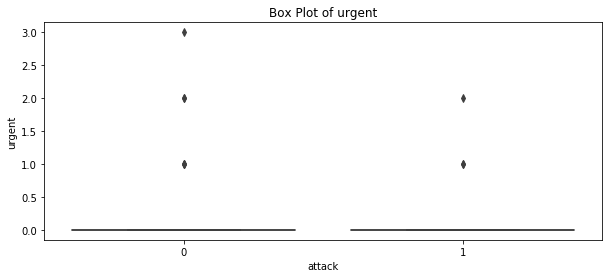

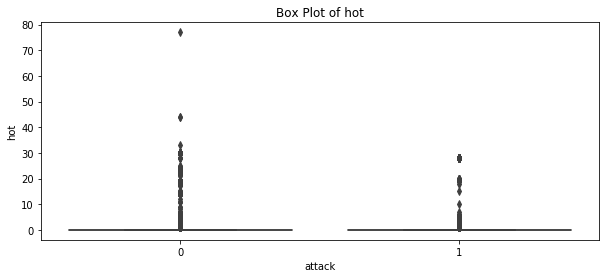

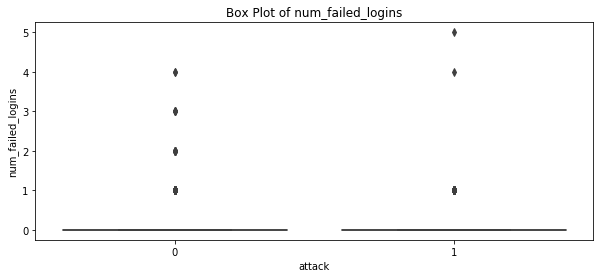

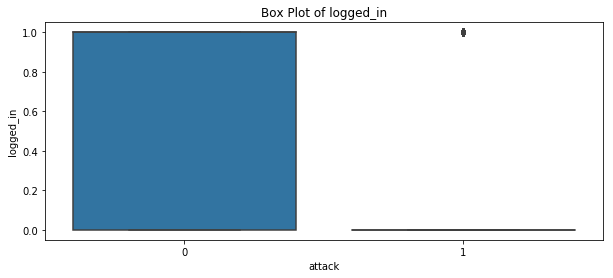

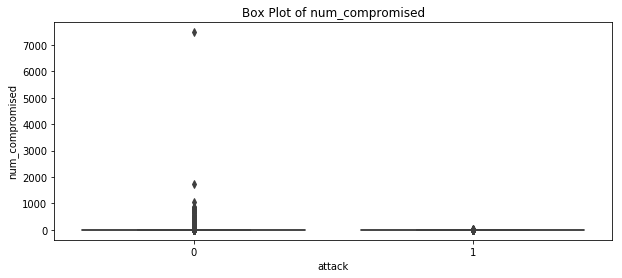

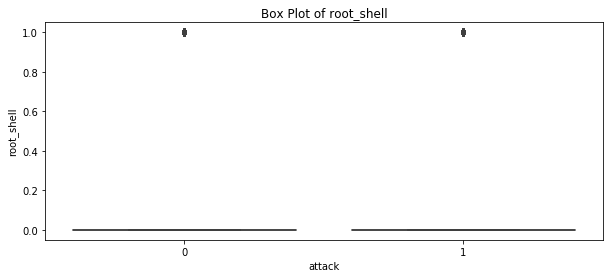

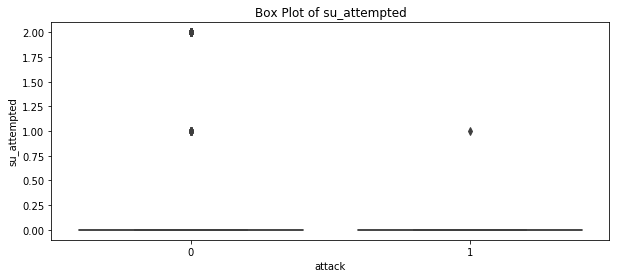

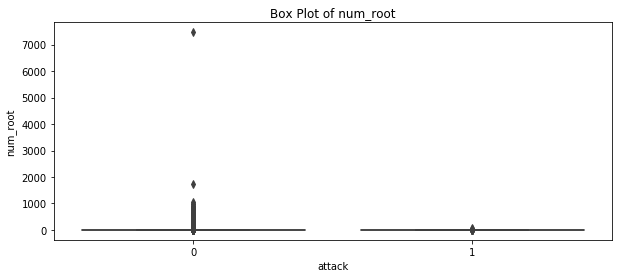

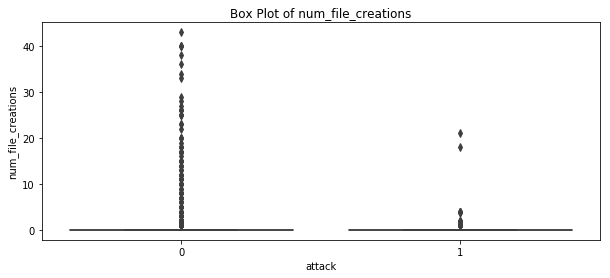

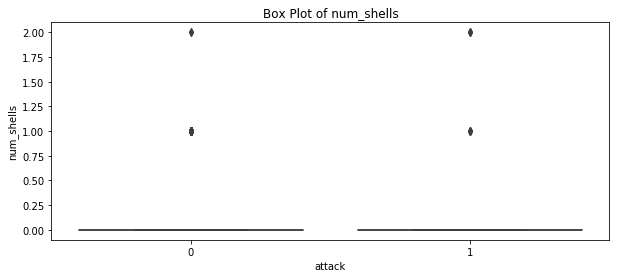

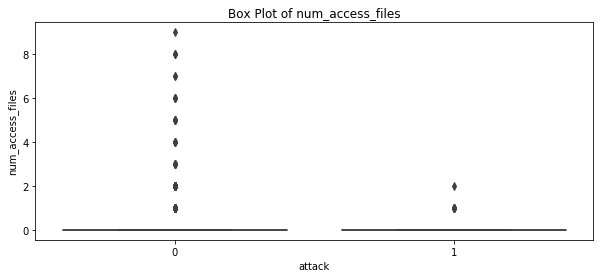

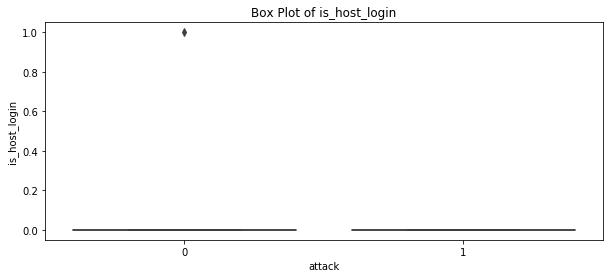

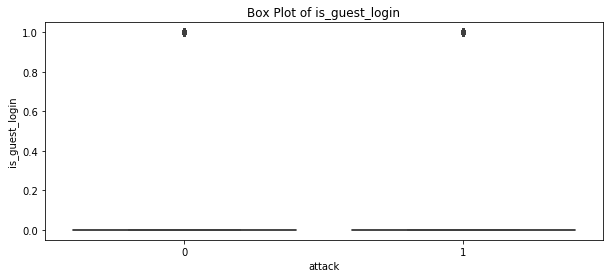

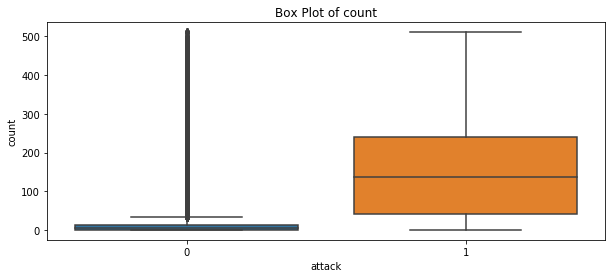

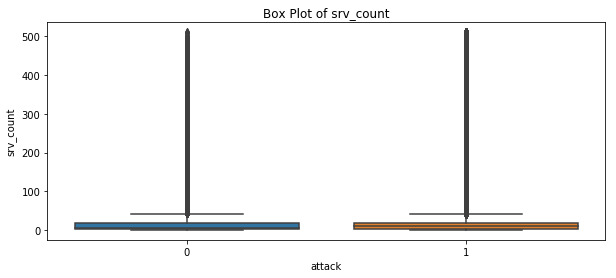

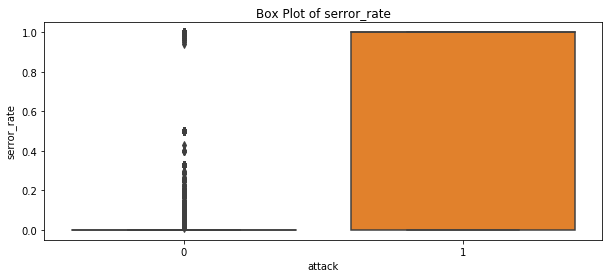

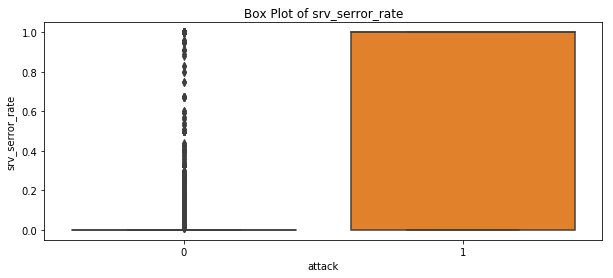

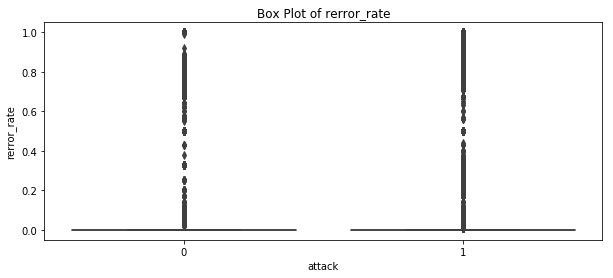

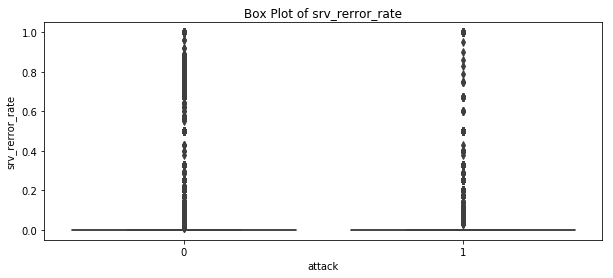

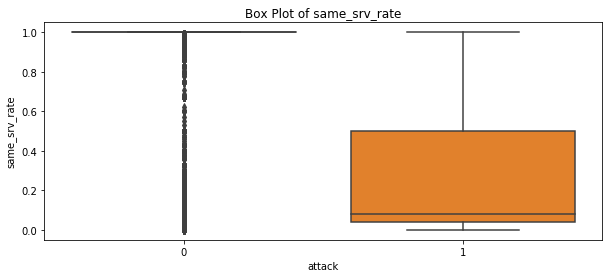

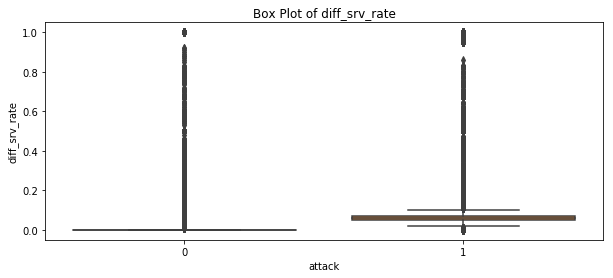

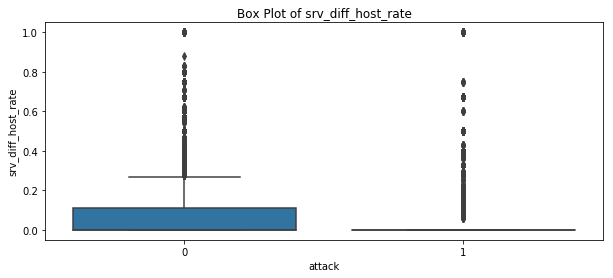

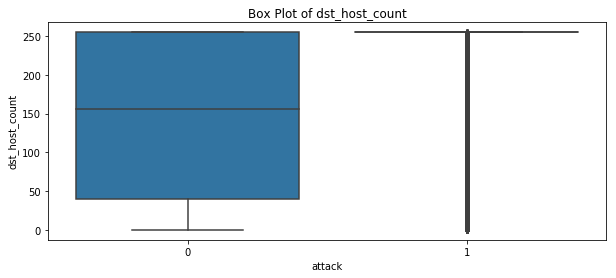

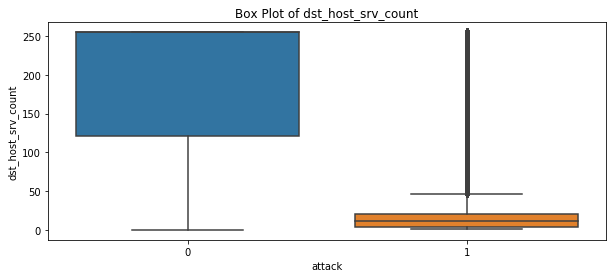

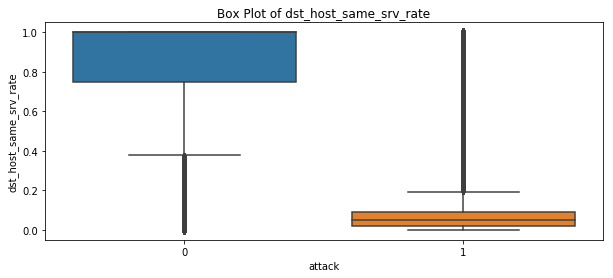

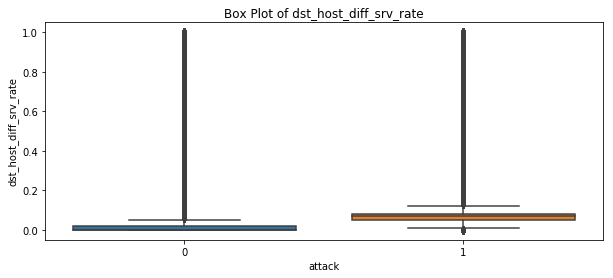

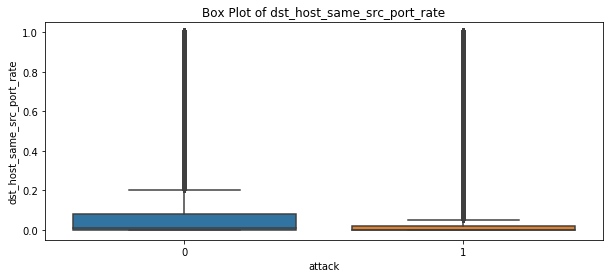

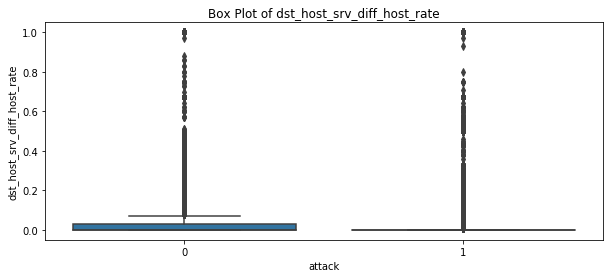

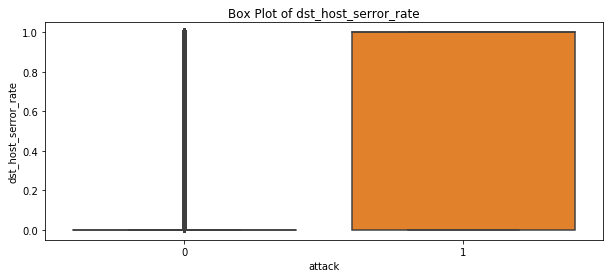

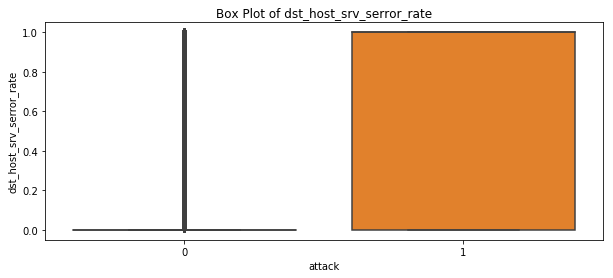

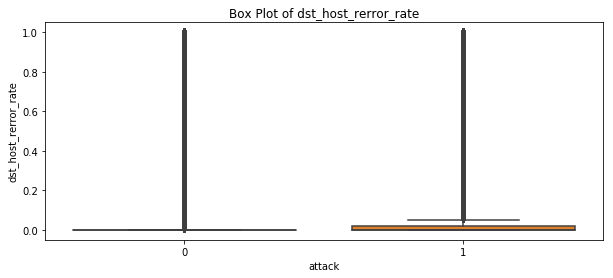

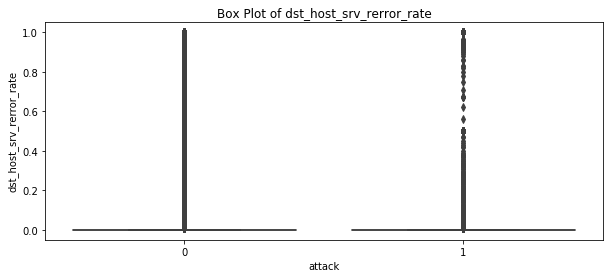

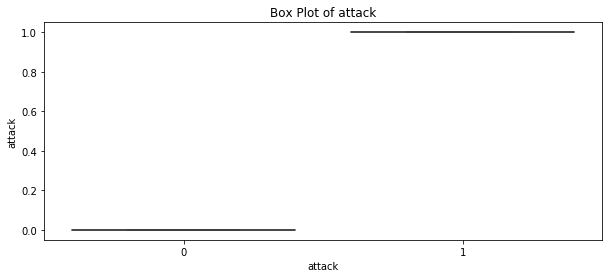

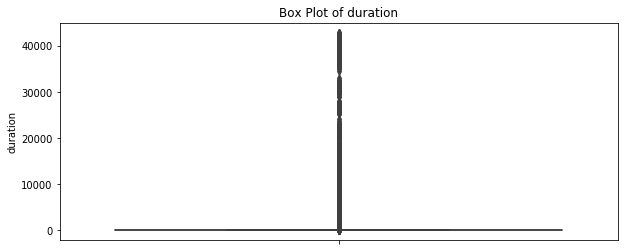

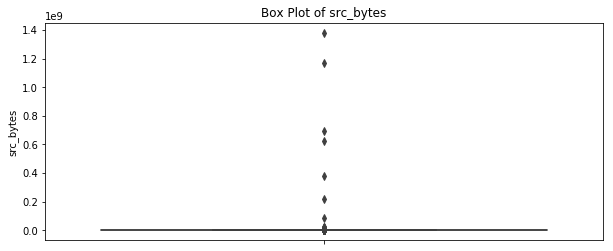

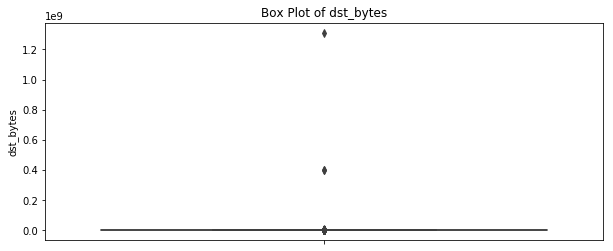

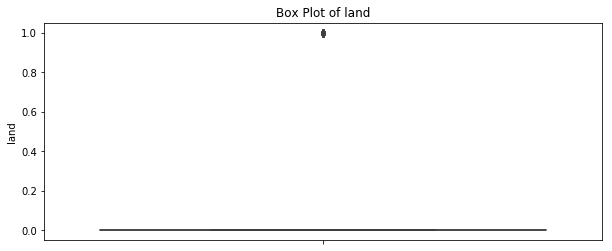

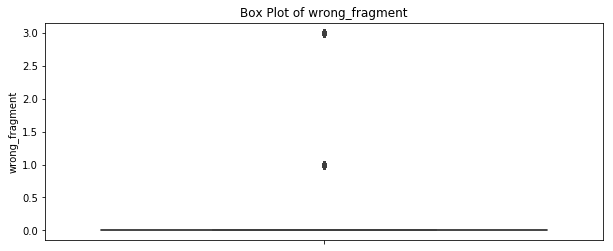

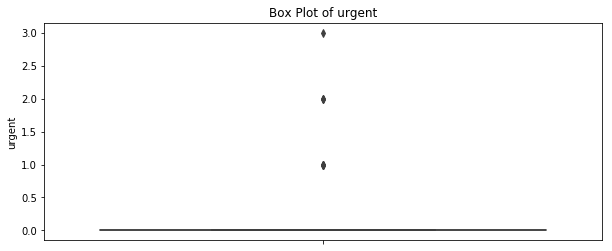

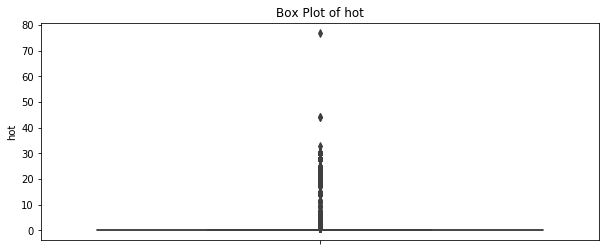

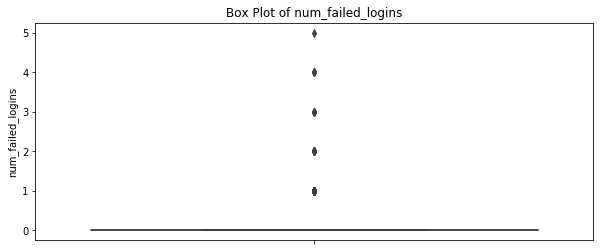

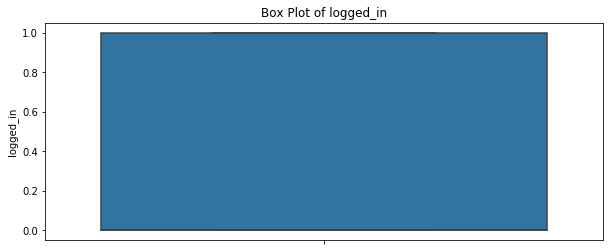

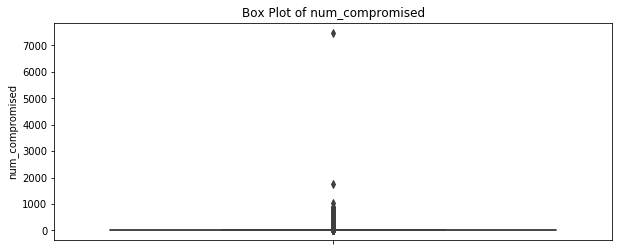

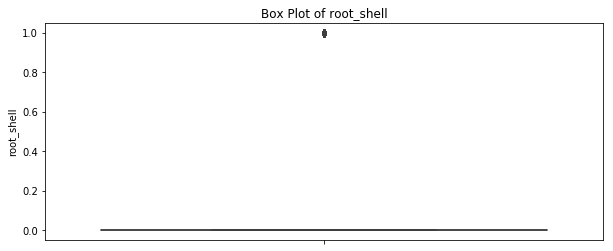

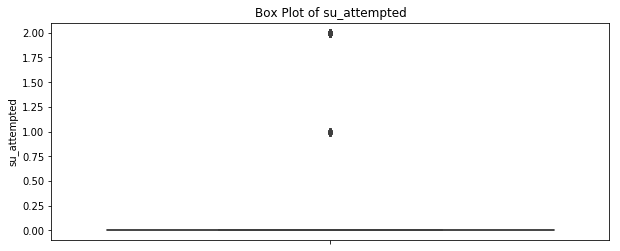

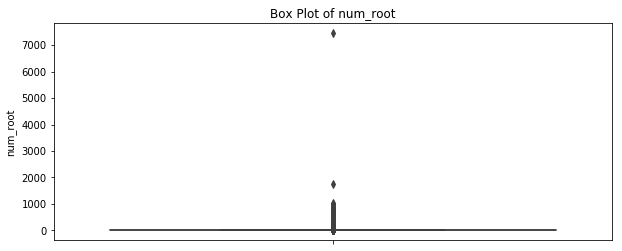

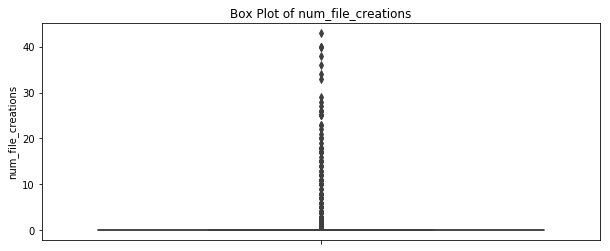

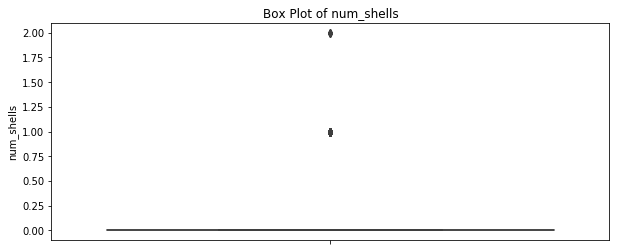

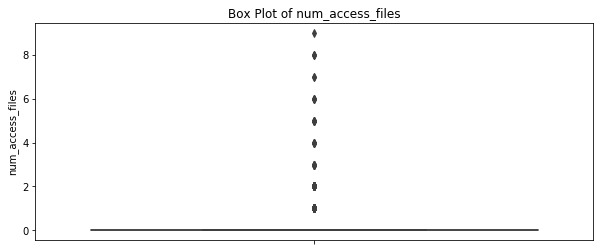

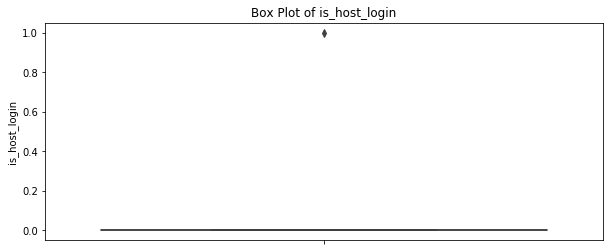

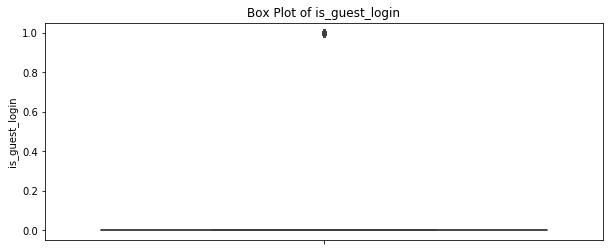

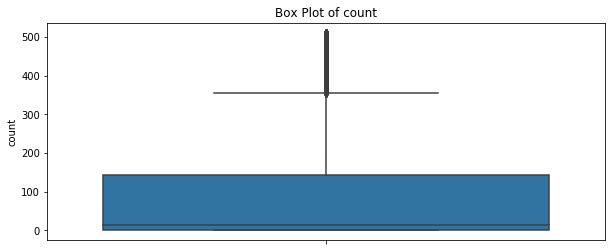

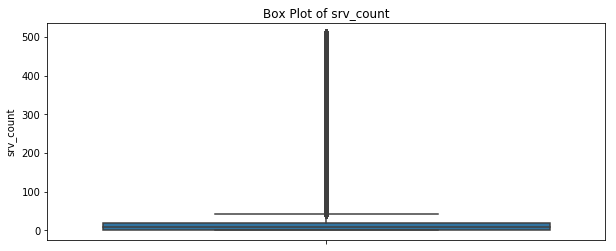

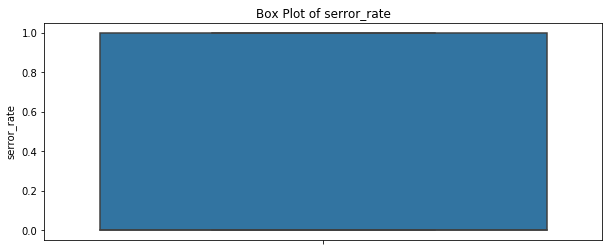

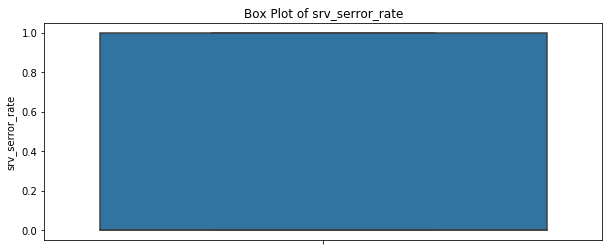

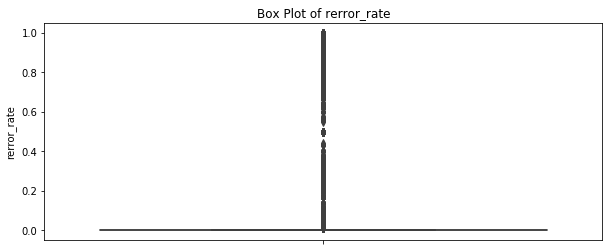

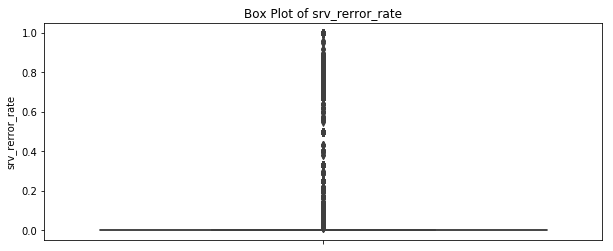

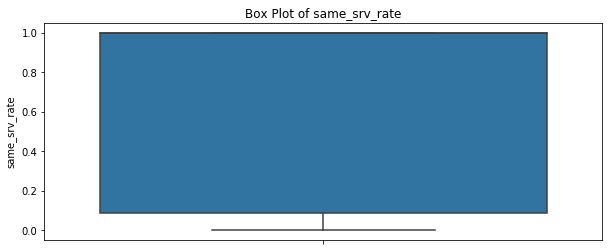

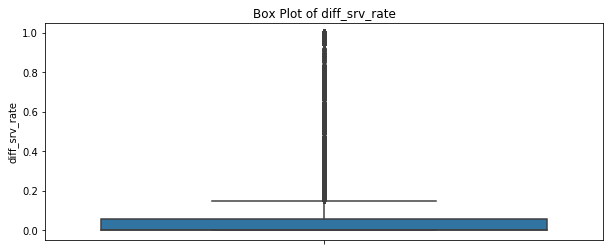

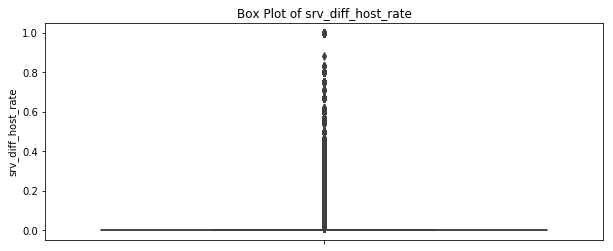

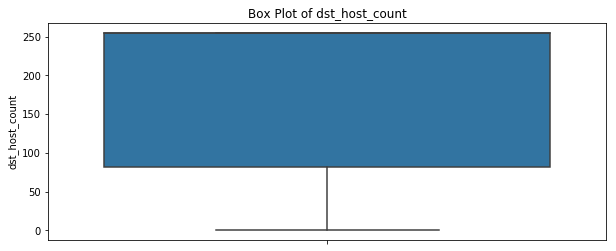

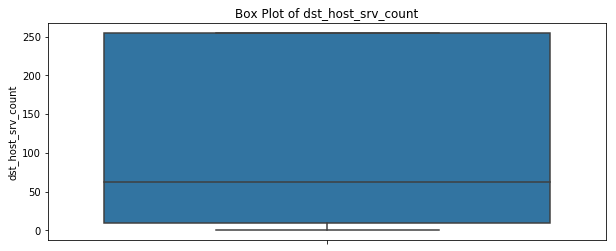

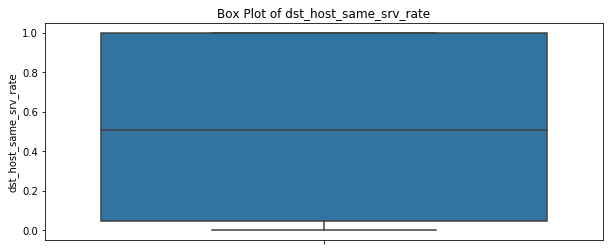

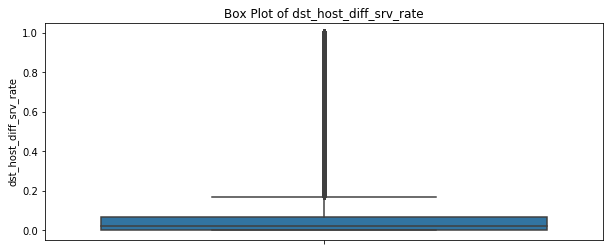

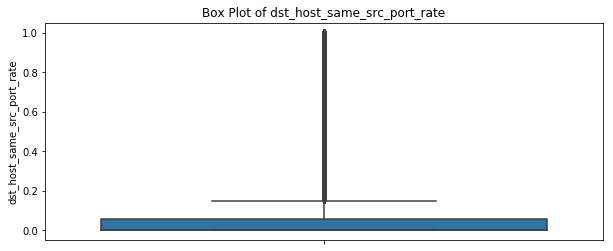

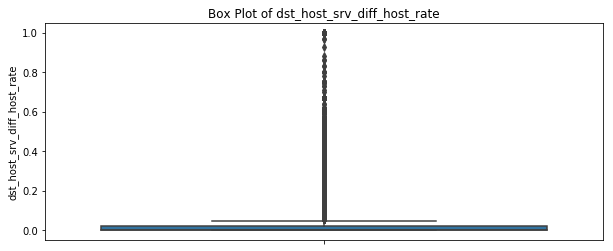

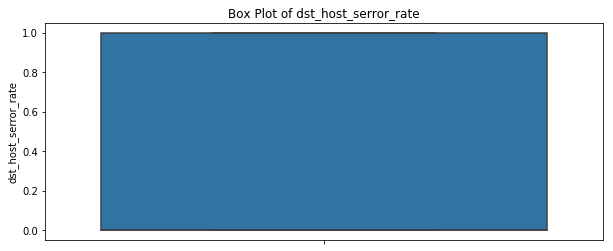

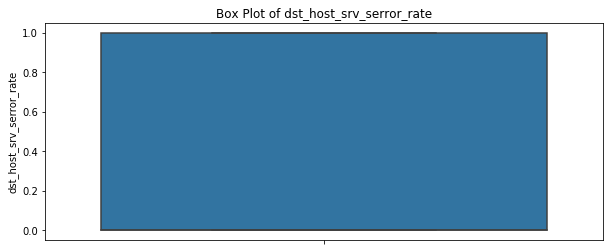

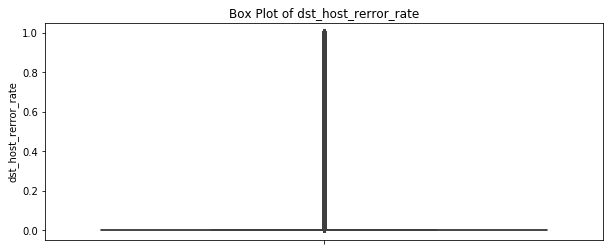

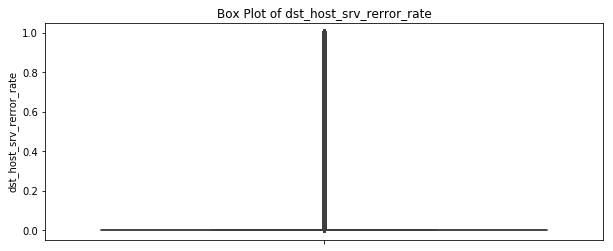

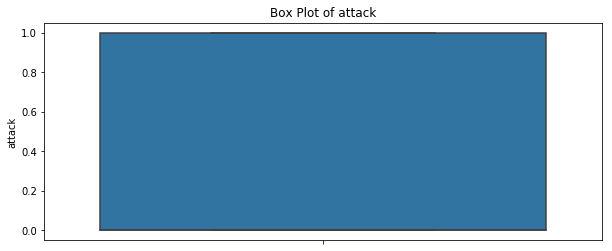

In [273]:
#Creating box plots between dependent variable and independent variable to gain insights about the data

bp = PdfPages('BoxPlots with Atack Split.pdf')

for num_variable in num_list:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(x='attack', y=num_variable, data = train_df)
    plt.title(str('Box Plot of ') + str(num_variable))
    bp.savefig(fig)
bp.close()

bp = PdfPages('BoxPlots with Total View.pdf')

for num_variable in num_list:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(y=num_variable, data = train_df)
    plt.title(str('Box Plot of ') + str(num_variable))
    bp.savefig(fig)
bp.close()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


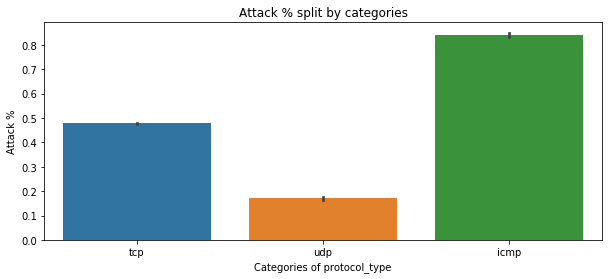

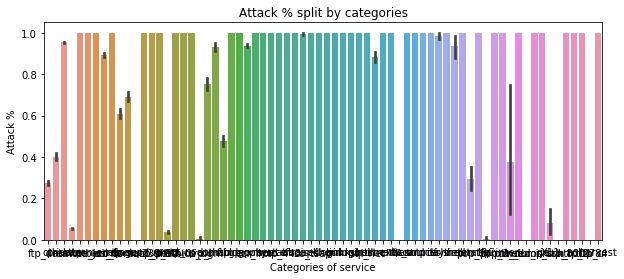

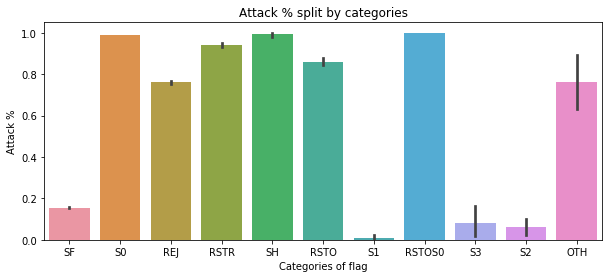

In [274]:
#creating bar plot between protocol_type and attack to see which protocol is most vulnerable to attack

bp = PdfPages('Attack Plots by Categorical Variable.pdf')

for cat_variable in cat_list:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=cat_variable,y='attack',data=train_df) 
    plt.ylabel('Attack %')
    plt.xlabel(str('Categories of ') + str(cat_variable))
    plt.title('Attack % split by categories')
    bp.savefig(fig)

bp.close()

## Data Preprocessing

#### Handling Categorical And Numerical Variable : Dummy Variable Creation

##### 1.Train Data

In [23]:
train_df.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,0


In [24]:
#Creating dummy for the categorical variables for train data 

dummy_protocol_type=pd.get_dummies(train_df['protocol_type'],prefix='protocol',drop_first=True)
dummy_service=pd.get_dummies(train_df['service'],prefix='service',drop_first=True)
dummy_flag=pd.get_dummies(train_df['flag'],prefix='flag',drop_first=True)

In [25]:
#Concatinating dummy variable with actual train data

train_df=pd.concat([train_df,dummy_protocol_type,dummy_service,dummy_flag],axis=1)

In [26]:
# Dropping original categorical variable because now we have their dummies

train_df=train_df.drop(['protocol_type','service','flag'],axis=1)

In [27]:
#Brief look of our train data with dummy variable

train_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


#### 2.Test data

In [28]:
test_df.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.0,0.0,0.0,0.0,1.0,1.0,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.0,0.0,0.0,0.0,1.0,1.0,1


In [29]:
#Creating dummy varian=bles for categorical variables of test data so that they can contribute to the model

dummy_protocol_type=pd.get_dummies(test_df['protocol_type'],prefix='protocol',drop_first=True)
dummy_service=pd.get_dummies(test_df['service'],prefix='service',drop_first=True)
dummy_flag=pd.get_dummies(test_df['flag'],prefix='flag',drop_first=True)

In [30]:
#Concatinating the dummy variables with the original test data frame

test_df=pd.concat([test_df,dummy_protocol_type,dummy_service,dummy_flag],axis=1)

In [31]:
#Dropping the original categorical variable of test data because now we have their dummies

test_df=test_df.drop(['protocol_type','service','flag'],axis=1)

In [32]:
#Brief look of our test data with dummy variables

test_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Train data has 119 columns where as test data has 113 columns.So to make columns number equal we have to drop uncommon columns from train data

In [33]:
#These are the variables which are present in train data but not in test data

unique=set(train_df.columns.tolist())-set(test_df.columns.tolist())
unique

{'service_aol',
 'service_harvest',
 'service_http_2784',
 'service_http_8001',
 'service_red_i',
 'service_urh_i'}

Removing these extra columns from train data

In [34]:
#Here we dropped all those uncomman variables from train data

train_df=train_df.drop(['service_aol','service_harvest','service_http_2784','service_http_8001','service_red_i',
                        'service_urh_i'],axis=1)

In [35]:
#Brief look of our train data with dropped uncomman variables

train_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


Now both the train and test data have equal value so now we can proceed

### Train - Test split of both training and test data

#### 1.Train Data 

In [36]:
#Train test split for model building

X_train=train_df[train_df.columns.difference(['attack'])]
y_train=train_df['attack']

In [37]:
X_train.head()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,service_vmnet,service_whois,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment
0,2,0.00,0,150,0.03,0.05,0.17,0.17,0.00,25,...,0,0,491,2,0.00,0.0,0.0,0,0,0
1,13,0.15,0,255,0.60,0.00,0.88,0.00,0.00,1,...,0,0,146,1,0.00,0.0,0.0,0,0,0
2,123,0.07,0,255,0.05,0.00,0.00,0.10,1.00,26,...,0,0,0,6,0.00,0.0,1.0,0,0,0
3,5,0.00,8153,30,0.00,0.00,0.03,1.00,0.03,255,...,0,0,232,5,0.00,0.0,0.2,0,0,0
4,30,0.00,420,255,0.00,0.00,0.00,1.00,0.00,255,...,0,0,199,32,0.09,0.0,0.0,0,0,0


In [38]:
y_train.head()

0    0
1    0
2    1
3    0
4    0
Name: attack, dtype: int64

#### 2. Test Data

In [39]:
X_test=test_df[test_df.columns.difference(['attack'])]
y_test=test_df['attack']

In [40]:
X_test.head()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,service_vmnet,service_whois,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment
0,229,0.06,0,255,0.06,1.00,0.00,0.04,0.0,10,...,0,0,0,10,0.00,1.0,0.00,0,0,0
1,136,0.06,0,255,0.06,1.00,0.00,0.00,0.0,1,...,0,0,0,1,0.00,1.0,0.00,0,0,0
2,1,0.00,0,134,0.04,0.00,0.61,0.61,0.0,86,...,0,0,12983,1,0.00,0.0,0.00,0,0,0
3,1,0.00,0,3,0.00,0.00,1.00,1.00,0.0,57,...,0,0,20,65,1.00,0.0,0.00,0,0,0
4,1,0.00,15,29,0.17,0.83,0.03,0.31,0.0,86,...,0,0,0,8,0.75,0.5,0.12,0,0,0


In [41]:
y_test.head()

0    1
1    1
2    0
3    1
4    1
Name: attack, dtype: int64

### Scaling

Scaling can improve accuracy ,treat outlier problem and also adds on to the speed of calculation.Moreover we would also be building models like KNN ,Naive Bayes etc where scaling is a necessary part for calculating distance between observation points

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
#Scaling our train data
#Standar scaler will substract each observation from their mean and divide by its unit variance.This gives z score.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


### Random Forrest Model and Features Selection

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [46]:
#Making object of the model and setting its arameter

rfc=RandomForestClassifier(n_estimators=100, max_depth=2,random_state=1355,n_jobs=-1
                          )

In [47]:
#fitting the model to train data

rfc.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1355, verbose=0,
            warm_start=False)

In [48]:
#Model is predicting dependent variable values for test data
y_pred=rfc.predict(X_test_scaled)

In [49]:
#this is test data accuracy

rfc.score(X_test_scaled,y_test)

0.7338537970191625

In [50]:
#this is train data accuracy

train_score=rfc.score(X_train_scaled,y_train)
train_score

0.9149976582283506

In [51]:
radm_test_pred_df = pd.DataFrame( { 'actual':  y_test,
                            'predicted': y_pred } )

In [52]:
radm_test_pred_df.head()

,actual,predicted
0,1,1
1,1,1
2,0,0
3,1,0
4,1,0


In [53]:
#test accuracy whoch we already calculated by score method

test_score=metrics.accuracy_score(radm_test_pred_df.actual, radm_test_pred_df.predicted)
test_score

0.7338537970191625

In [54]:
#creating a data frame which will include train and test accuracy of all future model so that we can decide the best model

report=pd.DataFrame({'Model':['Random Forrest Pre'],'Train Score':train_score,'Test Score':test_score})

In [55]:
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.914998,0.733854


In [56]:
#creating the confusion matrix

tree_cm = metrics.confusion_matrix(radm_test_pred_df.actual, radm_test_pred_df.predicted,[1,0] )

In [57]:
tree_cm

array([[6845, 5799],
       [ 201, 9699]], dtype=int64)

Text(0.5, 15.0, 'True label')

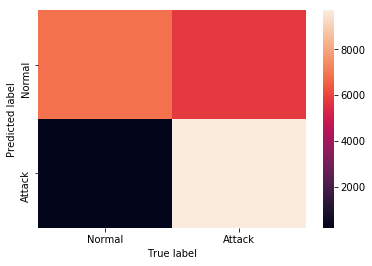

In [58]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

In [59]:
from sklearn.metrics import classification_report



In [60]:
#This is the classification report of the model performance

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.98      0.76      9900
           1       0.97      0.54      0.70     12644

   micro avg       0.73      0.73      0.73     22544
   macro avg       0.80      0.76      0.73     22544
weighted avg       0.82      0.73      0.73     22544



### Feature Selection

In [61]:
#Calculating the feature importances to choose best variables and dimentionality reduction

scores = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':scores})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

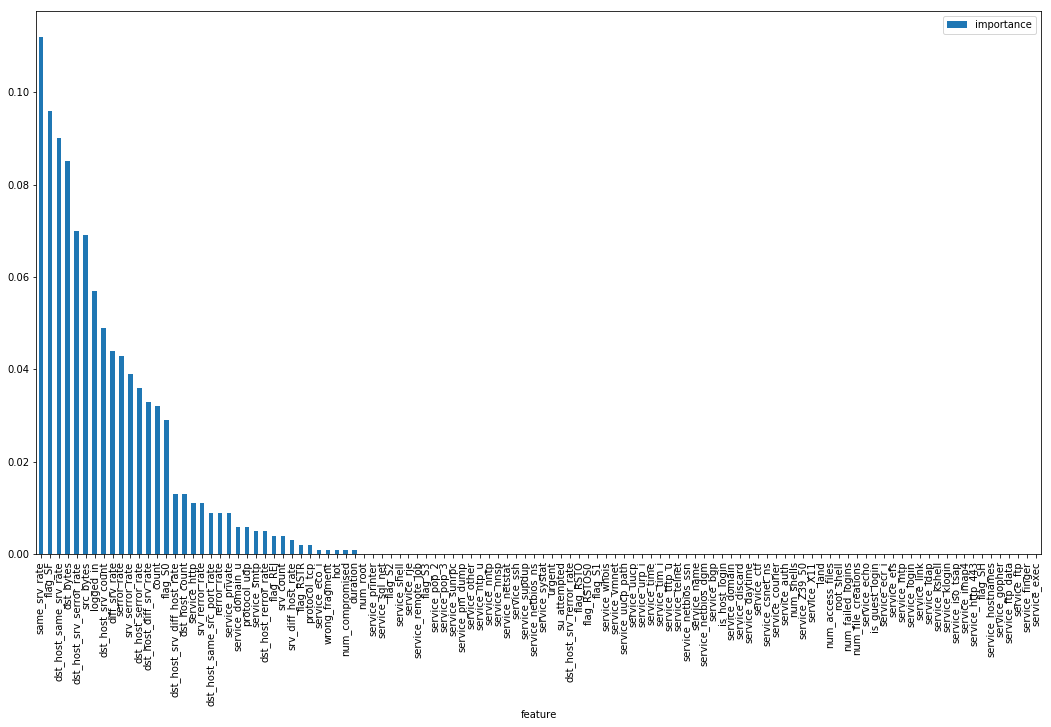

In [62]:
#this is the ranked order of the best variables in descending order

plt.rcParams['figure.figsize'] = (18, 10)
importances.plot.bar();


In [362]:
from sklearn.feature_selection import RFE


In [731]:
#Rfe can iteratively build model on an algorithm over train data and can come uo with the best varibles

rfe=RFE(rfc,n_features_to_select=10)
rfe.fit(X_train_scaled,y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1355, verbose=0,
            warm_start=False),
  n_features_to_select=10, step=1, verbose=0)

In [732]:
#Rfe gave us top 10 best variables as we demanded 

feature_map = [(i, v) for i, v in zip(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['count',
 'diff_srv_rate',
 'dst_bytes',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'flag_SF',
 'logged_in',
 'same_srv_rate',
 'src_bytes']

These are the most important features.We will now build models on these features

In [63]:
X_train_new=X_train[['count','diff_srv_rate','dst_bytes','dst_host_same_src_port_rate','dst_host_same_srv_rate',
                      'dst_host_srv_count','flag_SF','logged_in','same_srv_rate','src_bytes']]

In [64]:
X_test_new=X_test[['count','diff_srv_rate','dst_bytes','dst_host_same_src_port_rate','dst_host_same_srv_rate',
                      'dst_host_srv_count','flag_SF','logged_in','same_srv_rate','src_bytes']]

Scaling train and test data which now has reduced dimention   

In [65]:
X_train_new_scaled=scaler.fit_transform(X_train_new)
X_test_new_scaled=scaler.transform(X_test_new)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


### Building Final Random Forrest Model with Selected Features

In [66]:
#Rebuilding the random forrest model on the reduced dimention dataset

rfc.fit(X_train_new_scaled,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1355, verbose=0,
            warm_start=False)

In [67]:
#predicting dependent variable for the test data

y_pred=rfc.predict(X_test_new_scaled)

In [68]:
#Even after dimentionality reduction and choosing only 10 most important variable e are fetting more or like same accuracy
#So these 10 variables are sufficeint for model building

rfc.score(X_test_new_scaled,y_test)

0.7674769339957417

In [69]:
#Train accuracy which is also more or like same

train_score=rfc.score(X_train_new_scaled,y_train)
train_score

0.9454565660895589

In [70]:
radm_test_pred_df = pd.DataFrame( { 'actual':  y_test,
                            'predicted': y_pred } )

In [71]:
radm_test_pred_df.head()

,actual,predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,0


In [72]:
test_score=metrics.accuracy_score(radm_test_pred_df.actual, radm_test_pred_df.predicted)
test_score

0.7674769339957417

In [73]:
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.914998,0.733854


In [74]:
#Function to update report dataframe with current model and its test and train accuracy
def update_report(report,name,train,test):
    report=report.append({'Model':name,'Train Score':train,'Test Score':test},ignore_index=True)
    return report
    

In [75]:
report=update_report(report,'Random Forrest Final',train_score,test_score)

In [76]:
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.914998,0.733854
1,Random Forrest Final,0.945457,0.767477


In [77]:
#confusion matrix

tree_cm = metrics.confusion_matrix(radm_test_pred_df.actual, radm_test_pred_df.predicted,[1,0] )

In [78]:
tree_cm

array([[7678, 4966],
       [ 276, 9624]], dtype=int64)

Text(0.5, 69.0, 'True label')

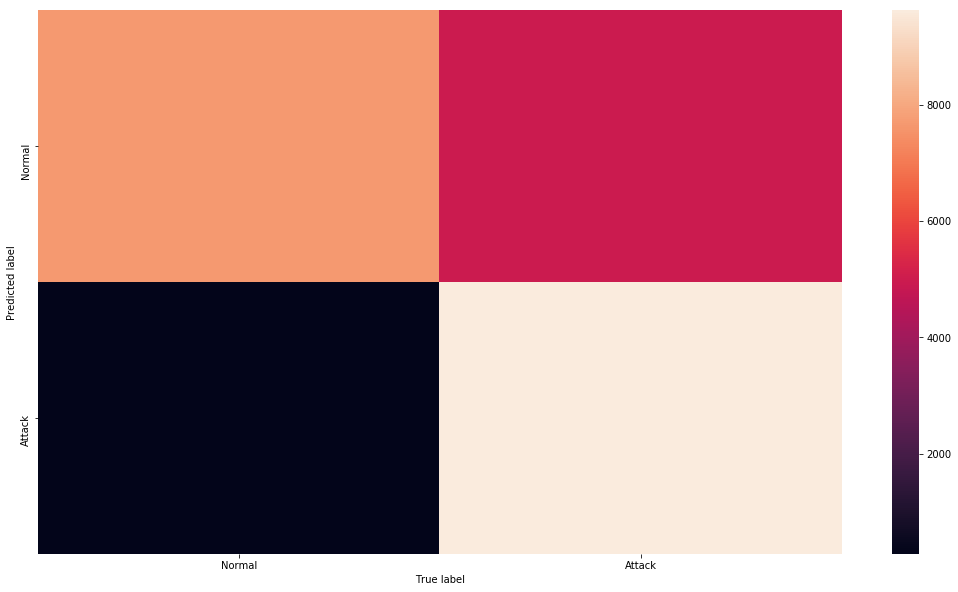

In [79]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

### KNN Model

In [80]:
from sklearn.neighbors import KNeighborsClassifier



In [81]:
knc=KNeighborsClassifier(20)

In [82]:
knc.fit(X_train_new_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [83]:
y_pred=knc.predict(X_test_new_scaled)

In [84]:
#test accuracy

knc.score(X_test_new_scaled,y_test)

0.7480482611781405

In [85]:
#train accuracy

train_score=knc.score(X_train_new_scaled,y_train)
train_score

0.9803370563533456

In [86]:
knn_test_pred_df = pd.DataFrame( { 'actual':  y_test,
                            'predicted': y_pred } )

In [87]:
knn_test_pred_df.head()

,actual,predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,0


In [88]:
test_score=metrics.accuracy_score(knn_test_pred_df.actual, knn_test_pred_df.predicted)
test_score

0.7480482611781405

In [89]:
report=update_report(report,'KNN',train_score,test_score)


In [90]:
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.914998,0.733854
1,Random Forrest Final,0.945457,0.767477
2,KNN,0.980337,0.748048


In [91]:
tree_cm = metrics.confusion_matrix(knn_test_pred_df.actual, knn_test_pred_df.predicted,[1,0] )

In [92]:
tree_cm

array([[7736, 4908],
       [ 772, 9128]], dtype=int64)

Text(0.5, 69.0, 'True label')

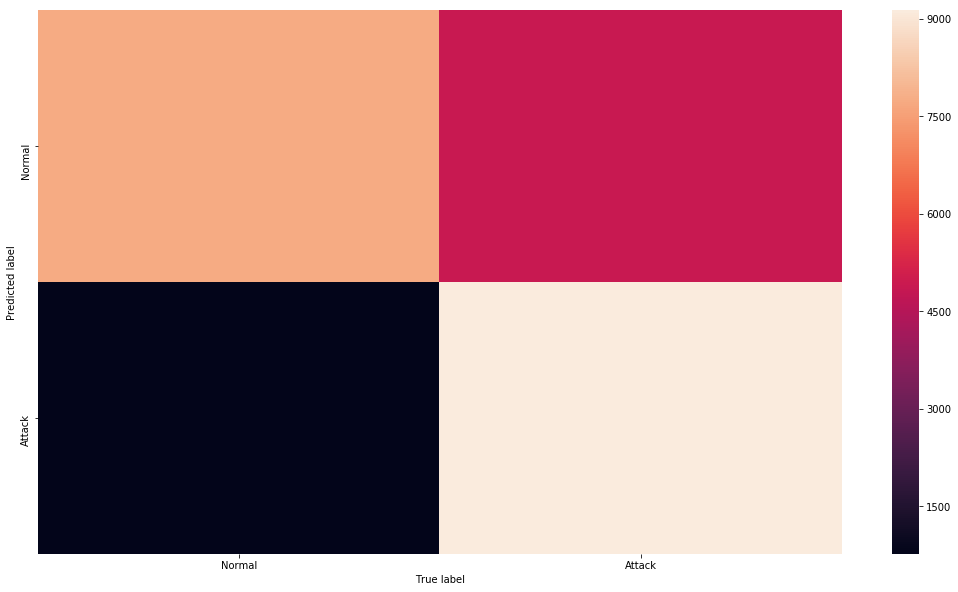

In [93]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

KNN model also guves us accuracy of 74% which is almost ssame like that rendered by Random Forrest Model

### Naive Bayes Model

In [94]:
from sklearn.naive_bayes import GaussianNB

In [95]:
nb = GaussianNB()

In [96]:
nb.fit(X_train_new_scaled,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [97]:
y_pred=nb.predict(X_test_new_scaled)

In [98]:
nb.score(X_test_new_scaled,y_test)

0.7188165365507452

In [99]:
train_score=nb.score(X_train_new_scaled,y_train)
train_score

0.9073214101434435

In [100]:
nb_test_pred_df = pd.DataFrame( { 'actual':  y_test,
                            'predicted': y_pred } )

In [101]:
nb_test_pred_df.head()

,actual,predicted
0,1,1
1,1,1
2,0,0
3,1,0
4,1,0


In [102]:
test_score=metrics.accuracy_score(nb_test_pred_df.actual,nb_test_pred_df.predicted)
test_score

0.7188165365507452

In [103]:
report=update_report(report,'Naive Bayes',train_score,test_score)
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.914998,0.733854
1,Random Forrest Final,0.945457,0.767477
2,KNN,0.980337,0.748048
3,Naive Bayes,0.907321,0.718817


Naive Bayes Model also gave decent acuuracy of ~71!!

In [104]:
tree_cm = metrics.confusion_matrix(nb_test_pred_df.actual, nb_test_pred_df.predicted,[1,0] )

In [105]:
tree_cm

array([[6913, 5731],
       [ 608, 9292]], dtype=int64)

Text(0.5, 69.0, 'True label')

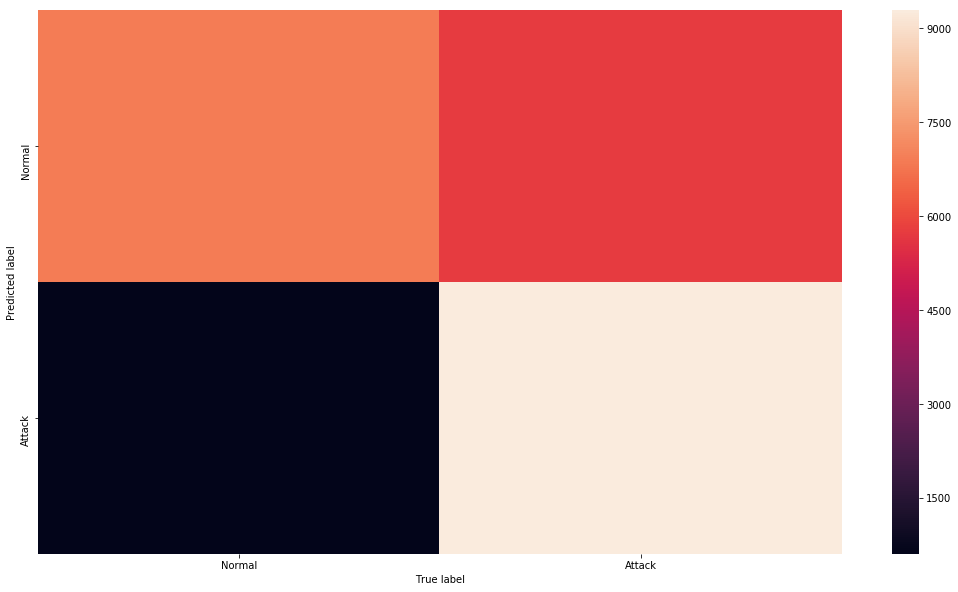

In [106]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

## SVM Model

In [107]:
from sklearn.svm import SVC

In [108]:
svc=SVC()

In [109]:
svc.fit(X_train_new_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [110]:
y_pred=svc.predict(X_test_new_scaled)

In [111]:
svc.score(X_test_new_scaled,y_test)

0.7642388218594748

In [112]:
train_score=svc.score(X_train_new_scaled,y_train)
train_score

0.9652862121248204

In [113]:
svc_test_pred_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [114]:
svc_test_pred_df.head()

,actual,predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1


In [115]:
test_score=metrics.accuracy_score(svc_test_pred_df.actual,svc_test_pred_df.predicted)
test_score

0.7642388218594748

In [116]:
report=update_report(report,'SVM',train_score,test_score)
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.914998,0.733854
1,Random Forrest Final,0.945457,0.767477
2,KNN,0.980337,0.748048
3,Naive Bayes,0.907321,0.718817
4,SVM,0.965286,0.764239


In [117]:
tree_cm=metrics.confusion_matrix(svc_test_pred_df.actual,svc_test_pred_df.predicted,[1,0])

In [118]:
tree_cm

array([[8094, 4550],
       [ 765, 9135]], dtype=int64)

Text(0.5, 69.0, 'True label')

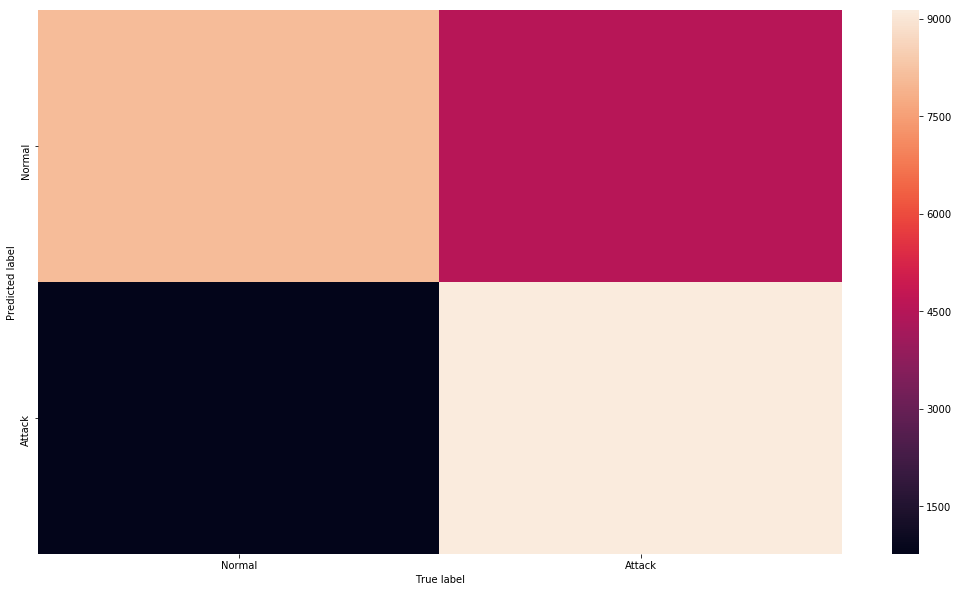

In [119]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

## XGBoost Model

In [120]:
from xgboost.sklearn  import XGBClassifier

In [121]:
xgb=XGBClassifier()

In [122]:
xgb.fit(X_train_new_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [123]:
y_pred=xgb.predict(X_test_new_scaled)

In [124]:
xgb.score(X_test_new_scaled,y_test)

0.7834013484740951

In [125]:
train_score=xgb.score(X_train_new_scaled,y_train)
train_score

0.9928079826629516

In [126]:
xgb_test_pred_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [127]:
xgb_test_pred_df.head()

,actual,predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,0


In [128]:
test_score=metrics.accuracy_score(xgb_test_pred_df.actual,xgb_test_pred_df.predicted)
test_score

0.7834013484740951

In [129]:
report=update_report(report,'XGBoost',train_score,test_score)


In [130]:
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.914998,0.733854
1,Random Forrest Final,0.945457,0.767477
2,KNN,0.980337,0.748048
3,Naive Bayes,0.907321,0.718817
4,SVM,0.965286,0.764239
5,XGBoost,0.992808,0.783401


In [131]:
tree_cm=metrics.confusion_matrix(xgb_test_pred_df.actual,svc_test_pred_df.predicted,[1,0])

In [132]:
tree_cm

array([[8094, 4550],
       [ 765, 9135]], dtype=int64)

Text(0.5, 69.0, 'True label')

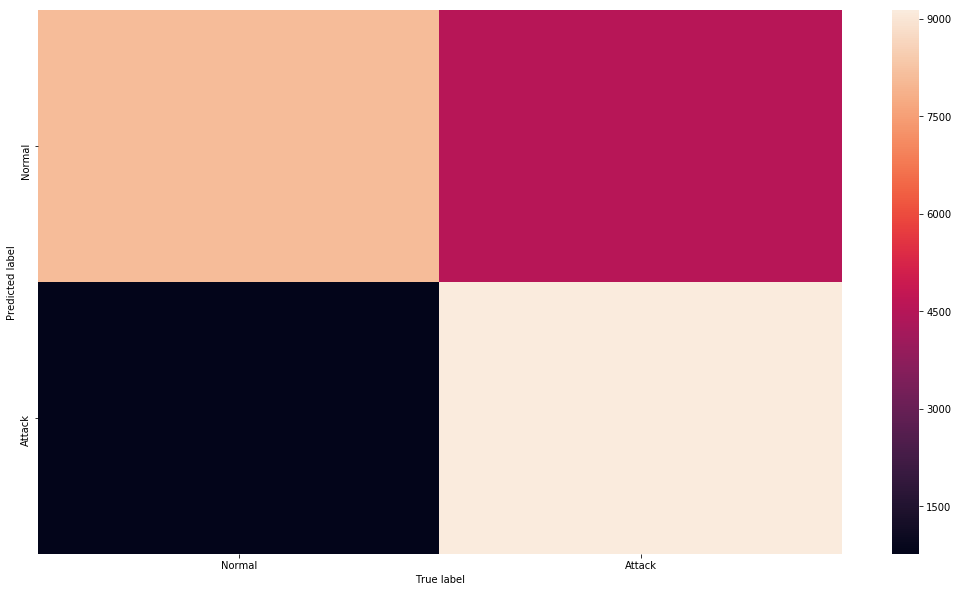

In [133]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

### Logistic Regression Model

For logistic regression we have to create dummy variable for flag variable

In [134]:
from sklearn.linear_model import LogisticRegression


In [135]:
lr=LogisticRegression(n_jobs=-1)

In [136]:
lr.fit(X_train_new_scaled,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [137]:
y_pred=lr.predict(X_test_new_scaled)

In [139]:
lr.score(X_test_new_scaled,y_test)

0.7259137686302342

In [140]:
train_score=lr.score(X_train_new_scaled,y_train)
train_score


0.9235232946742556

In [141]:
lr_test_pred_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [142]:
lr_test_pred_df.head()

,actual,predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,0


In [143]:
test_score=metrics.accuracy_score(lr_test_pred_df.actual,lr_test_pred_df.predicted)
test_score

0.7259137686302342

In [144]:
report=update_report(report,'LogisticRegression',train_score,test_score)
report


,Model,Train Score,Test Score
0,Random Forrest Pre,0.914998,0.733854
1,Random Forrest Final,0.945457,0.767477
2,KNN,0.980337,0.748048
3,Naive Bayes,0.907321,0.718817
4,SVM,0.965286,0.764239
5,XGBoost,0.992808,0.783401
6,LogisticRegression,0.923523,0.725914


In [145]:
tree_cm=metrics.confusion_matrix(xgb_test_pred_df.actual,svc_test_pred_df.predicted,[1,0])
tree_cm

array([[8094, 4550],
       [ 765, 9135]], dtype=int64)

Text(0.5, 69.0, 'True label')

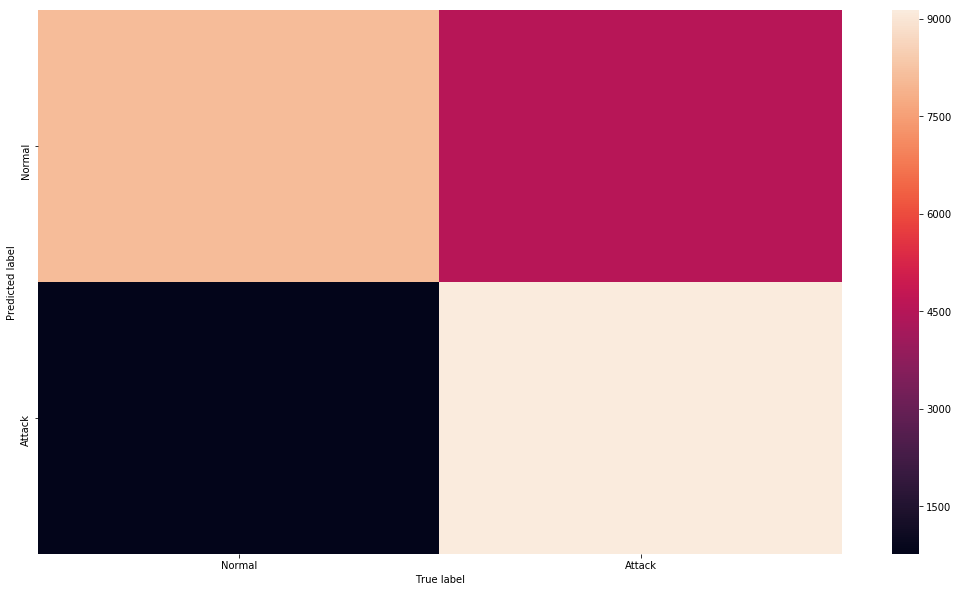

In [146]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

In [147]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
dt=DecisionTreeClassifier(max_depth=3)

In [149]:
dt.fit(X_train_new_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [150]:
y_pred=dt.predict(X_test_new_scaled)

In [151]:
dt.score(X_test_new_scaled,y_test)

0.7994144783534421

In [152]:
train_score=dt.score(X_train_new_scaled,y_train)
train_score

0.9606899891246536

In [153]:
dt_test_pred_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [154]:
dt_test_pred_df.head()

,actual,predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,0


In [155]:
test_score=metrics.accuracy_score(dt_test_pred_df.actual,dt_test_pred_df.predicted)
test_score

0.7994144783534421

In [157]:
report=update_report(report,'Decision Tree',train_score,test_score)
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.914998,0.733854
1,Random Forrest Final,0.945457,0.767477
2,KNN,0.980337,0.748048
3,Naive Bayes,0.907321,0.718817
4,SVM,0.965286,0.764239
5,XGBoost,0.992808,0.783401
6,LogisticRegression,0.923523,0.725914
7,Decision Tree,0.960690,0.799414


### Final Report And Analysis of Models

In [158]:
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.914998,0.733854
1,Random Forrest Final,0.945457,0.767477
2,KNN,0.980337,0.748048
3,Naive Bayes,0.907321,0.718817
4,SVM,0.965286,0.764239
5,XGBoost,0.992808,0.783401
6,LogisticRegression,0.923523,0.725914
7,Decision Tree,0.960690,0.799414


From above report it is clear that Decision Tree is best model to go with so we will tune its hyperparameter and calculate the best cutoff to increase its accuracy

### Final Model : Decision Tree Model

#### 1.Fine Tuning the model via Grid Search

In [159]:
from sklearn.tree import export_graphviz, export
from sklearn.model_selection import GridSearchCV 

In [160]:
X_train_new.head()

,count,diff_srv_rate,dst_bytes,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_srv_count,flag_SF,logged_in,same_srv_rate,src_bytes
0,2,0.00,0,0.17,0.17,25,1,0,1.00,491
1,13,0.15,0,0.88,0.00,1,1,0,0.08,146
2,123,0.07,0,0.00,0.10,26,0,0,0.05,0
3,5,0.00,8153,0.03,1.00,255,1,1,1.00,232
4,30,0.00,420,0.00,1.00,255,1,1,1.00,199


In [161]:
y_train.head()

0    0
1    0
2    1
3    0
4    0
Name: attack, dtype: int64

In [162]:
param_grid = {
             'max_features': np.arange(3,8),
              'criterion':['gini','entropy']}

In [163]:
gscv=GridSearchCV(DecisionTreeClassifier(max_depth=3),param_grid=param_grid,cv=10,n_jobs=-1)

In [164]:
gscv.fit(X_train_new,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': array([3, 4, 5, 6, 7]), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [165]:
gscv.best_score_

0.9570463512022418

In [166]:
gscv.best_params_


{'criterion': 'gini', 'max_features': 7}

In [167]:
dt_clf=gscv.best_estimator_

In [168]:
dt_clf.score(X_test_new,y_test)

0.7978176011355571

In [169]:
dt_clf.score(X_train_new,y_train)

0.9547045795527613

From the accuracy score we can discern that gridsearch gave us comparatively less accuracy then our vanila decision tree.
So we will go with the vanila decision tree

In [170]:
dtc=DecisionTreeClassifier('gini',max_depth=3)

In [171]:
dtc.fit(X_train_new,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [172]:
dtc.score(X_test_new,y_test)

0.7994144783534421

In [173]:
dtc.score(X_train_new,y_train)

0.9606899891246536

In [174]:
train_gini = 2*metrics.roc_auc_score(y_train,dtc.predict(X_train_new)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

The Gini Index for the model built on the Train Data is :  0.9209005503907868


In [175]:
test_gini = 2*metrics.roc_auc_score(y_test,dtc.predict(X_test_new)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Test Data is :  0.63584941474217


In [176]:
from sklearn.tree import export_graphviz,export
import os

In [177]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [178]:
export_graphviz( dtc,
              out_file = "intrusion_tree.odt",
              feature_names = X_train_new.columns )

In [179]:
import pydotplus as pdot

tree_graph = pdot.graphviz.graph_from_dot_file( 'intrusion_tree.odt' )

In [180]:
tree_graph.write_jpg( 'network_tree.jpg' )

True

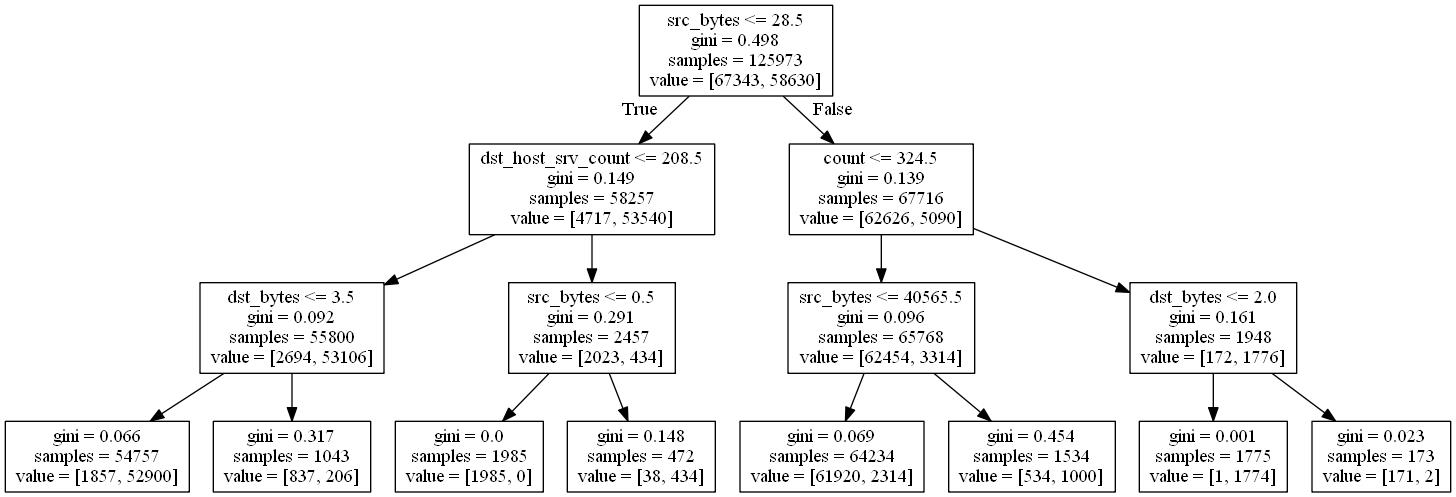

In [181]:
from PIL import Image
network_tree_pic = Image. open("network_tree.jpg")
network_tree_pic

## 2. Multinomial classification: Activity is normal or DOS or PROBE or R2L or U2R 

In [182]:
#reading the train data

names=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot",
       "num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", 
       "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","count","srv_count",
       "serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", 
       "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate",
       "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
       "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack"] 
train=pd.read_csv('Train.csv',names=names)


In [183]:
#reading the test data

test=pd.read_csv('Test.csv',names=names)

In [184]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


All other eda and preprocessing steps will be same as for binomial classification

In [185]:
train.shape

(125973, 42)

In [186]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [187]:
test.shape

(22544, 42)

In [1043]:
#A thorough report of the train dataset

pandas_profiling.ProfileReport(train)


Number of variables,42
Number of observations,125973
Total Missing (%),0.0%
Total size in memory,40.4 MiB
Average record size in memory,336.0 B
Numeric,25
Categorical,4
Boolean,5
Date,0
Text (Unique),0
Rejected,8


In [188]:
print(train['num_outbound_cmds'].value_counts())
print(test['num_outbound_cmds'].value_counts())

0    125973
Name: num_outbound_cmds, dtype: int64
0    22544
Name: num_outbound_cmds, dtype: int64


This variable 'num_outbound_cmds' should be dropped

In [189]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)


In [190]:
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [191]:
#Now creating the attack list which will incorporate the type of attack.There are 4 major
#list based on type of attack - normal,DoS,Probe,R2L,U2R

DoS_attack_1=['neptune','smurf','back','teardrop','pod','land','apache2','processtable','worm','udpstorm '] 


Probe_attack_2=['satan','ipsweep','portsweep','nmap','mscan','saint'] 


R2L_attack_3=['warezclient','guess_passwd','warezmaster','imap','ftp_write','multihop','phf','spy','snmpguess','mailbomb',
          'snmpgetattack ','httptunnel','named','sendmail','xsnoop','Xlock'] 


U2R_attack_4=['buffer_overflow','rootkit','loadmodule','perl','ps','xterm','sqlattack'] 

In [192]:
#Creating the dependent variable for train data whci will contain 0 for normal 1 for dos,2 for probe ,3 for R2L and 4 for U2R

train['attack']=train['attack'].apply(lambda x: 1 if x in DoS_attack_1 else 2 if x in Probe_attack_2 else 3 if x in R2L_attack_3 else 4 if x in U2R_attack_4 else 0)

In [193]:
#Creating the dependent variable for test data whci will contain 0 for normal 1 for dos,2 for probe ,3 for R2L and 4 for U2R

test['attack']=test['attack'].apply(lambda x: 1 if x in DoS_attack_1 else 2 if x in Probe_attack_2 else 3 if x in R2L_attack_3 else 4 if x in U2R_attack_4 else 0)

In [194]:
#Categorical distribution of our dependent variable in train data

train['attack'].value_counts()

0    67343
1    45927
2    11656
3      995
4       52
Name: attack, dtype: int64

In [195]:
#Categorical distribution of our dependent variable in test data

test['attack'].value_counts()

0    9900
1    7165
3    2991
2    2421
4      67
Name: attack, dtype: int64

## Data Preprocessing



### Handling Categorical And Numerical Variable : Dummy Variable Creation¶

#### Train Data

In [196]:
#this is how train data looks now

train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [197]:
#Dummy variable creation for the categorical variable of train data

dummy_protocol_type=pd.get_dummies(train['protocol_type'],prefix='protocol',drop_first=True)
dummy_service=pd.get_dummies(train['service'],prefix='service',drop_first=True)
dummy_flag=pd.get_dummies(train['flag'],prefix='flag',drop_first=True)

In [198]:
#concatenating the dummies with the original train data

train=pd.concat([train,dummy_protocol_type,dummy_service,dummy_flag],axis=1)

In [199]:
#Dropping the categorical variables becaus now we have their dummies

train=train.drop(['protocol_type','service','flag'],axis=1)

In [200]:
#Brief look of the preprocessed train data set

train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


#### Test Data

In [201]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,2
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,2


In [202]:
#Dummies creation for the categorical variable of test dataset

dummy_protocol_type=pd.get_dummies(test['protocol_type'],prefix='protocol',drop_first=True)
dummy_service=pd.get_dummies(test['service'],prefix='service',drop_first=True)
dummy_flag=pd.get_dummies(test['flag'],prefix='flag',drop_first=True)

In [203]:
#Concatenating the dummies with the original test dataset

test=pd.concat([test,dummy_protocol_type,dummy_service,dummy_flag],axis=1)

In [204]:
#Dropping the original categorical variable from the test data set beacsue now we have their dummies

test=test.drop(['protocol_type','service','flag'],axis=1)

In [205]:
#Brief look of the preprocessed test dataset

test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


There are 6 variables that are present in train data set and which are not present in test datasset.So dropping those from train data set

In [206]:
#Finding those uncomman features 

unique=set(train.columns.tolist())-set(test.columns.tolist())
unique

{'service_aol',
 'service_harvest',
 'service_http_2784',
 'service_http_8001',
 'service_red_i',
 'service_urh_i'}

In [207]:
#Dropping these uncomman variables from train dataset

train=train.drop(['service_aol','service_harvest','service_http_2784','service_http_8001','service_red_i',
                        'service_urh_i'],axis=1)

In [208]:
#Now the features are equal in both train and test

train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### Train - Test split of both training and test data

##### Train Data

In [209]:
X_train=train[train.columns.difference(['attack'])]
y_train=train['attack']

In [210]:
X_train.head()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,service_vmnet,service_whois,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment
0,2,0.00,0,150,0.03,0.05,0.17,0.17,0.00,25,...,0,0,491,2,0.00,0.0,0.0,0,0,0
1,13,0.15,0,255,0.60,0.00,0.88,0.00,0.00,1,...,0,0,146,1,0.00,0.0,0.0,0,0,0
2,123,0.07,0,255,0.05,0.00,0.00,0.10,1.00,26,...,0,0,0,6,0.00,0.0,1.0,0,0,0
3,5,0.00,8153,30,0.00,0.00,0.03,1.00,0.03,255,...,0,0,232,5,0.00,0.0,0.2,0,0,0
4,30,0.00,420,255,0.00,0.00,0.00,1.00,0.00,255,...,0,0,199,32,0.09,0.0,0.0,0,0,0


In [211]:
y_train.head()

0    0
1    0
2    1
3    0
4    0
Name: attack, dtype: int64

#### Test Data

In [212]:
X_test=test[test.columns.difference(['attack'])]
y_test=test['attack']

In [213]:
X_test.head()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,service_vmnet,service_whois,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment
0,229,0.06,0,255,0.06,1.00,0.00,0.04,0.0,10,...,0,0,0,10,0.00,1.0,0.00,0,0,0
1,136,0.06,0,255,0.06,1.00,0.00,0.00,0.0,1,...,0,0,0,1,0.00,1.0,0.00,0,0,0
2,1,0.00,0,134,0.04,0.00,0.61,0.61,0.0,86,...,0,0,12983,1,0.00,0.0,0.00,0,0,0
3,1,0.00,0,3,0.00,0.00,1.00,1.00,0.0,57,...,0,0,20,65,1.00,0.0,0.00,0,0,0
4,1,0.00,15,29,0.17,0.83,0.03,0.31,0.0,86,...,0,0,0,8,0.75,0.5,0.12,0,0,0


In [214]:
y_test.head()

0    1
1    1
2    0
3    2
4    2
Name: attack, dtype: int64

### Feature Scaling

Scaling will improve accuracy,make calculations swift and supress the effect of the outlier

In [216]:
#Using min max scaler to sacle the data between the range o and 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Random Forrest Model And Feature Selection

In [1180]:
#Building the random forrest object with defiend attribute, making class weight balanced will prioritise the 
#class based on frequency thusaugmenting the accuracy

rfc=RandomForestClassifier(n_estimators=1000, max_depth=3,random_state=135,n_jobs=-1,class_weight='balanced')

In [1181]:
#Building the random forrest model

rfc.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=135, verbose=0, warm_start=False)

In [1182]:
y_pred=rfc.predict(X_test_scaled)

In [1183]:
#Test accuracy 

rfc.score(X_test_scaled,y_test)

0.738555713271824

In [1184]:
#Train accuracy

rfc.score(X_train_scaled,y_train)

0.8265342573408587

In [1185]:
#Confusion tree

metrics.confusion_matrix(y_test,y_pred)

array([[8705,    0,  618,  531,   46],
       [1926, 4283,  820,    0,  136],
       [  17,  168, 2226,    8,    2],
       [1245,    0,  186, 1395,  165],
       [   0,    0,    3,   23,   41]], dtype=int64)

In [1172]:
#Ranking the variables according to their importances

scores = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':scores})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

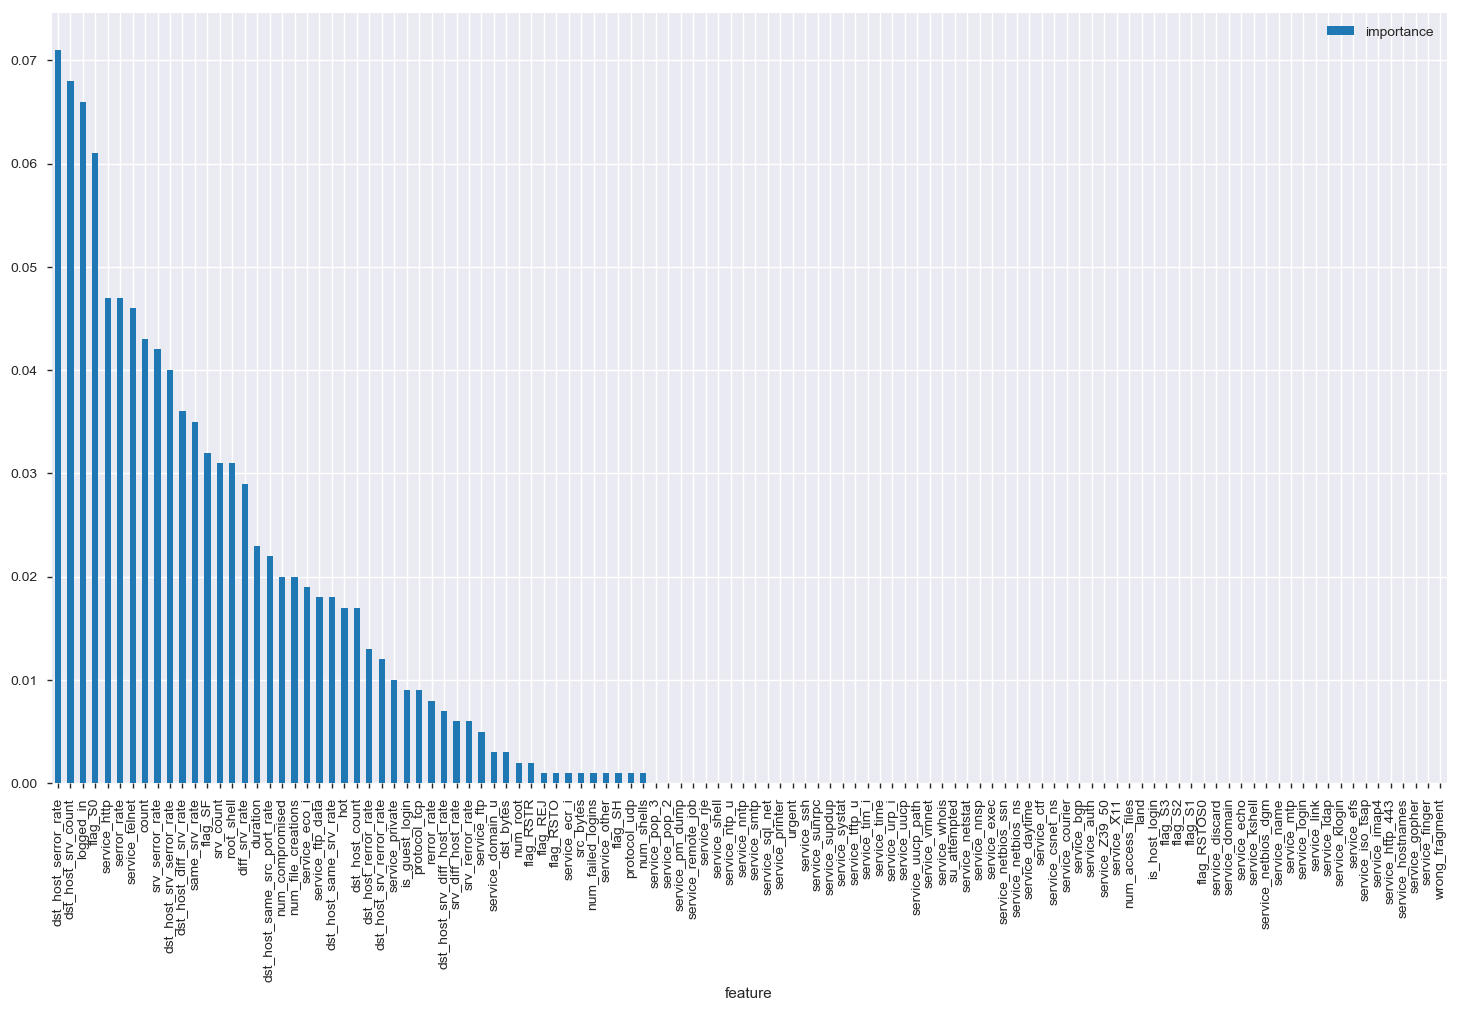

In [1173]:
plt.rcParams['figure.figsize'] = (18, 10)
importances.plot.bar();

In [1265]:
importances.head()

,importance
feature,
dst_host_serror_rate,0.071
dst_host_srv_count,0.068
logged_in,0.066
flag_S0,0.061
service_http,0.047


To reduce dimentionality I tried using 10 variables but accuracy decreased drastically.Then I took 20 variables again accuracy was very pathetic.After constant striving I reached to 60 variables which gave me the nearest accuracy to the random forrest model which was built on 113 variables.
So going ahead with 60 variables

In [217]:
#Creating new train dataset by choosing top 60 variables

X_train_new=X_train[['count','dst_host_serror_rate','dst_host_srv_count','dst_host_srv_serror_rate','flag_S0','logged_in',
 'root_shell','serror_rate','service_http','service_telnet','srv_serror_rate','dst_host_diff_srv_rate','same_srv_rate',
                   'flag_SF','srv_count','root_shell','diff_srv_rate','duration','dst_host_same_src_port_rate'
,'num_compromised','num_file_creations','service_eco_i','service_ftp_data','dst_host_same_srv_rate','hot','dst_host_count',
'dst_host_rerror_rate','dst_host_srv_rerror_rate','service_private','is_guest_login','protocol_tcp','rerror_rate',
'dst_host_srv_diff_host_rate','srv_diff_host_rate','srv_rerror_rate','service_ftp','service_domain_u'
,'dst_bytes','num_root','flag_RSTR','flag_REJ','flag_RSTO','service_ecr_i','src_bytes','num_failed_logins','service_other'
,'flag_SH','protocol_udp','num_shells','service_pop_3','service_pop_2' ,'service_pm_dump','service_remote_job','service_rje'
,'service_shell','service_ntp_u','service_nntp','service_smtp','service_sql_net','service_printer','urgent']]

In [218]:
#Creating new test variable by chosing top 60 variables

X_test_new=X_test[['count','dst_host_serror_rate','dst_host_srv_count','dst_host_srv_serror_rate','flag_S0','logged_in',
 'root_shell','serror_rate','service_http','service_telnet','srv_serror_rate','dst_host_diff_srv_rate','same_srv_rate',
                   'flag_SF','srv_count','root_shell','diff_srv_rate','duration','dst_host_same_src_port_rate'
,'num_compromised','num_file_creations','service_eco_i','service_ftp_data','dst_host_same_srv_rate','hot','dst_host_count',
'dst_host_rerror_rate','dst_host_srv_rerror_rate','service_private','is_guest_login','protocol_tcp','rerror_rate',
'dst_host_srv_diff_host_rate','srv_diff_host_rate','srv_rerror_rate','service_ftp','service_domain_u'
,'dst_bytes','num_root','flag_RSTR','flag_REJ','flag_RSTO','service_ecr_i','src_bytes','num_failed_logins','service_other'
,'flag_SH','protocol_udp','num_shells','service_pop_3','service_pop_2' ,'service_pm_dump','service_remote_job','service_rje'
,'service_shell','service_ntp_u','service_nntp','service_smtp','service_sql_net','service_printer','urgent']]

In [219]:
#Scaling our new train and test dataset

scale=MinMaxScaler(feature_range=(0,1))
X_train_new_scaled=scale.fit_transform(X_train_new)
X_test_new_scaled=scale.transform(X_test_new)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Building final Random Forrest Model

In [1239]:
rfc=rfc=RandomForestClassifier(n_estimators=1000, max_depth=3,random_state=145,n_jobs=-1,class_weight='balanced')

In [1240]:
rfc.fit(X_train_new_scaled,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=145, verbose=0, warm_start=False)

In [1241]:
y_pred=rfc.predict(X_test_new_scaled)

In [1242]:
#Test accuracy

rfc.score(X_test_new_scaled,y_test)

0.714513839602555

In [1243]:
#Train accuracy

rfc.score(X_train_new_scaled,y_train)

0.8146904495407746

In [1244]:
#Confusion matrix

metrics.confusion_matrix(y_test,y_pred)

array([[8604,    0,  717,  532,   47],
       [1911, 3956, 1180,    0,  118],
       [  36,  166, 2191,   28,    0],
       [1233,    0,  276, 1318,  164],
       [   0,    0,    6,   22,   39]], dtype=int64)

### Logistic Model

In [1255]:
mul_lr=LogisticRegression(multi_class='multinomial', solver='newton-cg',n_jobs=-1,class_weight='balanced')

In [1256]:
mul_lr.fit(X_train_new_scaled,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=-1, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

In [1257]:
y_pred=mul_lr.predict(X_test_new_scaled)

In [1258]:
#Test accuracy

mul_lr.score(X_test_new_scaled,y_test)

0.785929737402413

In [1259]:
#train accuracy

mul_lr.score(X_train_new_scaled,y_train)

0.9451152231033634

In [1262]:
#Confusion matrix

tree=metrics.confusion_matrix(y_test,y_pred)
tree

array([[8986,  538,  267,   58,   51],
       [1086, 6024,   53,    0,    2],
       [ 353,  174, 1873,   14,    7],
       [1814,    4,    4,  795,  374],
       [  15,    0,    0,   12,   40]], dtype=int64)

### XGBoost Model

In [1266]:
#Creating object of XGboost model

xgb=XGBClassifier(n_estimators=1000,objective='multi:softmax',num_class=5)

In [1267]:
#Fitting Xgboost model

xgb.fit(X_train_new_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None, num_class=5,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [1268]:
#Model class prediction of test dataset 

y_pred=xgb.predict(X_test_new_scaled)

In [1269]:
#Test accuracy

xgb.score(X_test_new_scaled,y_test)

0.7708481192334989

In [1270]:
#Train accuracy

xgb.score(X_train_new_scaled,y_train)

0.999944432537131

In [1271]:
#confusion matrix

metrics.confusion_matrix(y_test,y_pred)

array([[9640,   67,  190,    2,    1],
       [1090, 6048,   27,    0,    0],
       [ 775,  161, 1485,    0,    0],
       [2793,    0,    2,  194,    2],
       [  51,    0,    0,    5,   11]], dtype=int64)

### Naive Bayes Model

In [1272]:
from sklearn.naive_bayes import MultinomialNB

In [1273]:
#Creating object of multinomial naive bayes

mnb=MultinomialNB()

In [1274]:
#Fitting the model to the train data

mnb.fit(X_train_new_scaled,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [1276]:
#Predicting on test data set

y_pred=mnb.predict(X_test_new_scaled)

In [1277]:
#Test accuracy

mnb.score(X_test_new_scaled,y_test)

0.6453158268275373

In [1278]:
#Train accuracy

mnb.score(X_train_new_scaled,y_train)

0.8595810213299675

In [1279]:
#Confusion matrix

metrics.confusion_matrix(y_test,y_pred)

array([[9556,    8,  280,   48,    8],
       [1950, 2324, 2891,    0,    0],
       [  57,  331, 2033,    0,    0],
       [2234,   22,  122,  605,    8],
       [  35,    0,    0,    2,   30]], dtype=int64)

## Decision Tree Model

In [299]:
#Creating object of decision tree classifier

dt=DecisionTreeClassifier(max_depth=4,max_features=8)

In [300]:
#Building the decision tree model

dt.fit(X_train_new_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [301]:
#Predicting class o test data via decision tree model

y_pred=dt.predict(X_test_new_scaled)

In [302]:
#Test score

dt.score(X_test_new_scaled,y_test)

0.7011621717530163

In [303]:
#train score

dt.score(X_train_new_scaled,y_train)

0.9078056408913021

In [304]:
#Confusion matrix

metrics.confusion_matrix(y_test,y_pred)

array([[9843,   28,   29,    0,    0],
       [1784, 5228,  153,    0,    0],
       [1084,  601,  736,    0,    0],
       [2966,   22,    3,    0,    0],
       [  67,    0,    0,    0,    0]], dtype=int64)

### KNN Model

In [305]:
knn=KNeighborsClassifier(20,weights='distance',n_jobs=-1)

In [306]:
knn.fit(X_train_new_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
           weights='distance')

In [307]:
y_pred=knn.predict(X_test_new_scaled)

In [308]:
#Test score

knn.score(X_test_new_scaled,y_test)

0.7566092973740242

In [310]:
#Train score

knn.score(X_train_new_scaled,y_train)

0.999944432537131

In [311]:
#Confusion matrix

metrics.confusion_matrix(y_test,y_pred)

array([[9219,   45,  632,    3,    1],
       [1109, 6008,   48,    0,    0],
       [ 454,  350, 1572,   45,    0],
       [2708,    4,   22,  256,    1],
       [  61,    0,    0,    4,    2]], dtype=int64)

### SVM Model

In [312]:
svc=SVC()

In [314]:
svc.fit(X_train_new_scaled,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [315]:
y_pred=svc.predict(X_test_new_scaled)

In [316]:
#test accuracy

svc.score(X_test_new_scaled,y_test)

0.7225869410929737

In [317]:
#Train accuracy

svc.score(X_train_new_scaled,y_train)

0.975248664396339

In [319]:
#Confusion matrix

metrics.confusion_matrix(y_test,y_pred)

array([[9203,  515,  182,    0,    0],
       [1525, 5621,   19,    0,    0],
       [ 787,  168, 1466,    0,    0],
       [2988,    1,    2,    0,    0],
       [  67,    0,    0,    0,    0]], dtype=int64)

#### Conclusion:
So,Decision tree gave us best accuracy for binomial classification and Logistic model gave us best accuracy for multinomial classification